In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.5)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [21]:
df_train = pd.read_csv('train.csv')

In [22]:
df_train.shape

(891, 12)

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [29]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [31]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
            

In [33]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx, axis=1)

In [34]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [35]:
df_train.dropna(inplace=True)

In [36]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [39]:
df_train_dummied = pd.get_dummies(df_train, columns=['Sex'])

In [41]:
df_train_dummied = pd.get_dummies(df_train_dummied, columns=['Embarked'])

In [42]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


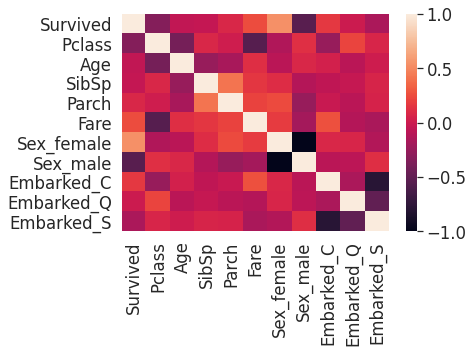

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [44]:
used_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [45]:
X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 10)
(267, 10)
(622,)
(267,)


In [48]:
LogReg = LogisticRegression()

In [49]:
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred = LogReg.predict(X_test)

In [51]:
metrics.confusion_matrix(y_test, y_pred)

array([[142,  24],
       [ 22,  79]])

In [52]:
metrics.accuracy_score(y_test, y_pred)

0.8277153558052435

In [53]:
len(X_test)

267

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.77       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [55]:
LogReg.coef_

array([[-8.78319852e-01, -3.16263756e-02, -2.13968799e-01,
        -4.68253406e-02,  1.62467759e-03,  1.88629506e+00,
        -4.07011280e-01,  9.14136870e-01,  3.47870224e-01,
         2.17276687e-01]])

In [56]:
LogReg.intercept_

array([1.69589126])

In [57]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [58]:
LogReg.predict_proba(X_test)

array([[0.28385999, 0.71614001],
       [0.38771655, 0.61228345],
       [0.93302474, 0.06697526],
       [0.30966921, 0.69033079],
       [0.93455555, 0.06544445],
       [0.15623383, 0.84376617],
       [0.35178134, 0.64821866],
       [0.52051367, 0.47948633],
       [0.77182415, 0.22817585],
       [0.41214787, 0.58785213],
       [0.73021775, 0.26978225],
       [0.21947183, 0.78052817],
       [0.75887601, 0.24112399],
       [0.18169327, 0.81830673],
       [0.85957385, 0.14042615],
       [0.3811415 , 0.6188585 ],
       [0.8652042 , 0.1347958 ],
       [0.3102632 , 0.6897368 ],
       [0.19567043, 0.80432957],
       [0.41127654, 0.58872346],
       [0.88585255, 0.11414745],
       [0.5875324 , 0.4124676 ],
       [0.85181316, 0.14818684],
       [0.92850779, 0.07149221],
       [0.50036045, 0.49963955],
       [0.49752398, 0.50247602],
       [0.04769423, 0.95230577],
       [0.86309315, 0.13690685],
       [0.88851361, 0.11148639],
       [0.36616232, 0.63383768],
       [0.